In [78]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from random import sample
import math
import matplotlib.pyplot as plt

list_tickers = ['^GSPC']

data_raw = yf.download(list_tickers, start="2020-01-01", end="2021-01-18")['Adj Close']
data_raw.dropna(inplace = True)
data = data_raw.tail(n=11)
data

[*********************100%***********************]  1 of 1 completed


Date
2020-12-31    3756.070068
2021-01-04    3700.649902
2021-01-05    3726.860107
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
2021-01-11    3799.610107
2021-01-12    3801.189941
2021-01-13    3809.840088
2021-01-14    3795.540039
2021-01-15    3768.250000
Name: Adj Close, dtype: float64

In [79]:
type(data_raw)

pandas.core.series.Series

Text(0.5, 1.0, 'S&P 500 variations')

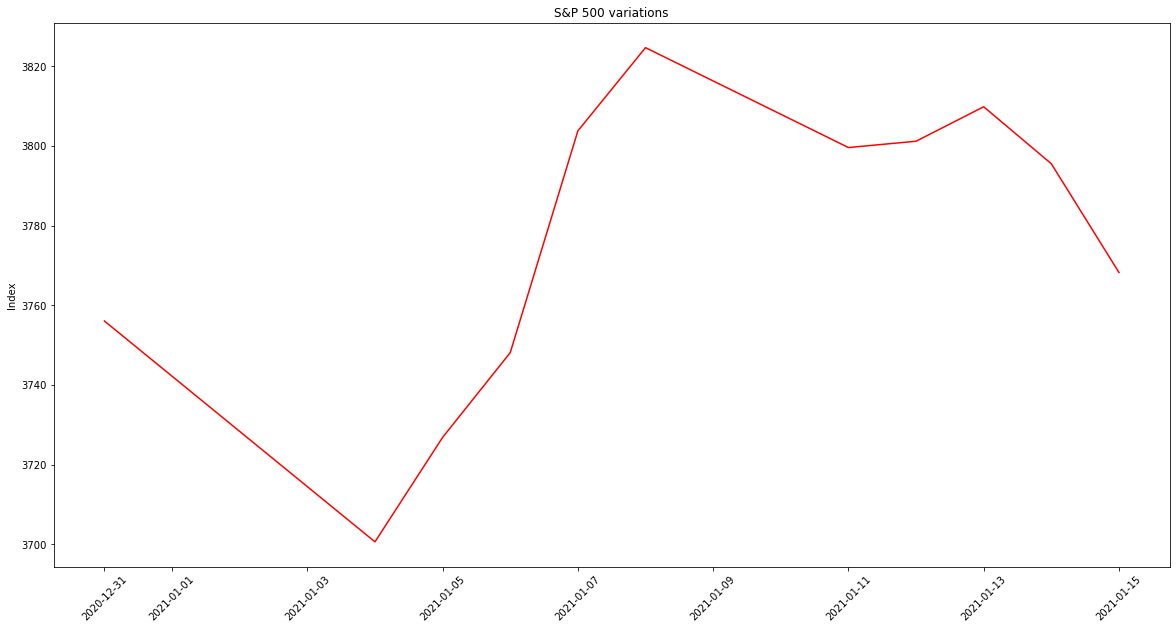

In [80]:
plt.figure(figsize=(20,10))
plt.plot(data, color='red')
plt.xticks(rotation = 45)
plt.ylabel('Index')
plt.title('S&P 500 variations')

In [81]:
data.shape #total number of trade days 

(11,)

In [146]:
move=[0,0,0] #[up, flat, down]
def var(ticker):
    for i in range(len(ticker)-1):
        if (ticker[i]-ticker[i-1])/ticker[i-1]>0.001:
            move[0]+=1
        
        elif (ticker[i]-ticker[i-1])/ticker[i-1]<-0.001:
            move[2]+=1
            
        else:
            move[1]+=1
            print(i)
            
            
    print("L'indice a monté (en % des journées) : {}".format((move[0]/sum(move))*100.00))
    print("L'indice n'a pas bougé (en % des journées): {}".format((move[1]/sum(move))*100.00))
    print("L'indice a baissé (en % des journées): {}".format((move[2]/sum(move))*100.00))
        
var(data)

print(move)

7
L'indice a monté (en % des journées) : 50.0
L'indice n'a pas bougé (en % des journées): 10.0
L'indice a baissé (en % des journées): 40.0
[5, 1, 4]


In [147]:
move

[5, 1, 4]

Text(0.5, 0, 'Outcomes')

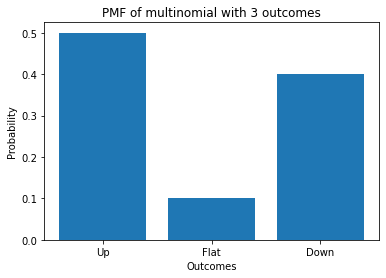

In [148]:
occurence = [move[0]/sum(move), move[1]/sum(move), move[2]/sum(move)]
plt.bar(['Up', 'Flat', 'Down'], occurence)
plt.title('PMF of multinomial with 3 outcomes')
plt.ylabel('Probability')
plt.xlabel('Outcomes')

In [149]:
Outcomes = ['Up', 'Flat', 'Down']
# Observations
c = np.array(occurence)
#Pseudocounts
alphas = np.array([1, 1, 1])
expected = (alphas + c) / (c.sum() + alphas.sum())
print("Prevalence de Up: {}".format(expected[0]*100.00))
print("Prevalence de Flat: {}".format(expected[1]*100.00))
print("Prevalence de Down: {}".format(expected[2]*100.00))

Prevalence de Up: 37.5
Prevalence de Flat: 27.500000000000004
Prevalence de Down: 35.0


In [150]:
test_alpha = np.array([[0.1, 0.1, 0.1], [1, 1, 1], [5, 5, 5], [15, 15, 15]])
c = np.array(occurence)
res = []
for i in range(len(test_alpha)):
    alphas = test_alpha[i]   
    res.append((alphas + c) / (c.sum() + alphas.sum()))

res2 = np.round(res, decimals=3)*100 #increasing sum(alpha) disminish the weight of historical data
df = pd.DataFrame(res2, columns=["Up","Flat","Down"], index=['[0.1, 0.1, 0.1]','[1, 1, 1]','[5, 5, 5]', '[15, 15, 15]'])
df

,Up,Flat,Down
"[0.1, 0.1, 0.1]",46.2,15.4,38.5
"[1, 1, 1]",37.5,27.5,35.0
"[5, 5, 5]",34.4,31.9,33.8
"[15, 15, 15]",33.7,32.8,33.5


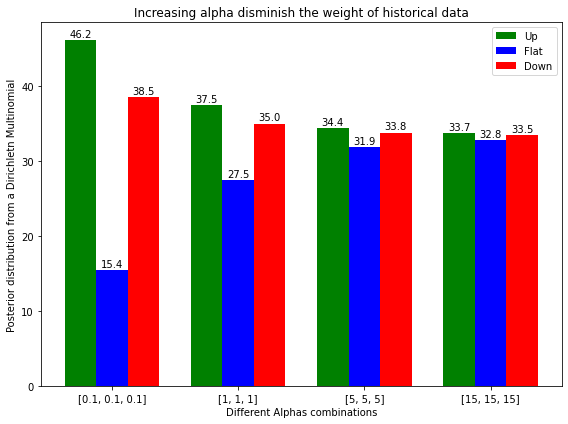

In [152]:
labels = ['[0.1, 0.1, 0.1]','[1, 1, 1]','[5, 5, 5]', '[15, 15, 15]']
Up = [round(i,1) for i in df['Up']]
Flat = [round(i,1) for i in df['Flat']]
Down = [round(i,1) for i in df['Down']]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - (width), Up, width, label='Up', color="Green")
rects2 = ax.bar(x, Flat, width, label='Flat', color="Blue")
rects3 = ax.bar(x + (width), Down, width, label='Down', color="Red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Different Alphas combinations')
ax.set_ylabel('Posterior distribution from a Dirichletn Multinomial')
ax.set_title('Increasing alpha disminish the weight of historical data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show() 
#modifying sum(alpha) has a huge effects on the informativeness of the data we have access to.
#Modifying alpha is also a great advantage to add inforamtion from an expert for example in case of a
#Bull market (going Up) or Bear market (going Down). For the former case, increase weight of the fist alpha and in the latter,
#increase weight on the last alpha will increase respectively their probability of happening

In [153]:
occurence

[0.5, 0.1, 0.4]

In [154]:
import pymc3 as pm

alphas = np.array([0.15,0.15,0.15])
c = np.array(move)  #problem with probability vector : to check by replacing with np.array(occurence). 
#If not np.array([6,0,4]) works

# Create model
with pm.Model() as model:
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial(
        'observed_data', n=sum(move), p=parameters, shape=3, observed=c)     #if np.array(occurence), change n ?
    # Sample from the posterior
    trace = pm.sample(draws=1000, chains=2, tune=1000, 
                      discard_tuned_samples=True)

C:\Users\Nathan\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 91 seconds.


In [155]:
summary = pm.summary(trace)
summary.index = Outcomes
summary

C:\Users\Nathan\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Up,0.499,0.149,0.238,0.787,0.005,0.003,992.0,992.0,1002.0,1099.0,1.0
Flat,0.112,0.092,0.000,0.280,0.004,0.003,663.0,663.0,506.0,476.0,1.0
Down,0.389,0.145,0.141,0.677,0.004,0.003,1703.0,1680.0,1696.0,1629.0,1.0


In [156]:
# Samples
trace_df = pd.DataFrame(trace['parameters'], columns = Outcomes)
trace_df.head(n=10)

,Up,Flat,Down
0,0.629315,0.062411,0.308274
1,0.351929,0.183831,0.464240
2,0.351929,0.183831,0.464240
3,0.376841,0.227179,0.395980
4,0.588620,0.219199,0.192181
5,0.583563,0.137827,0.278610
6,0.583563,0.137827,0.278610
7,0.623886,0.046638,0.329476
8,0.824811,0.042201,0.132988
9,0.896557,0.040337,0.063105


In [157]:
trace_df.shape

(2000, 3)

In [158]:
# For probabilities use samples after burn in
pvals = trace_df.iloc[:, :3].mean(axis = 0)
dict(zip(Outcomes, pvals))

{'Up': 0.4991030268274803,
 'Flat': 0.11186235731201329,
 'Down': 0.38903461586050647}

In [159]:
summary.iloc[:, 2:4]

,hdi_3%,hdi_97%
Up,0.238,0.787
Flat,0.000,0.280
Down,0.141,0.677


C:\Users\Nathan\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


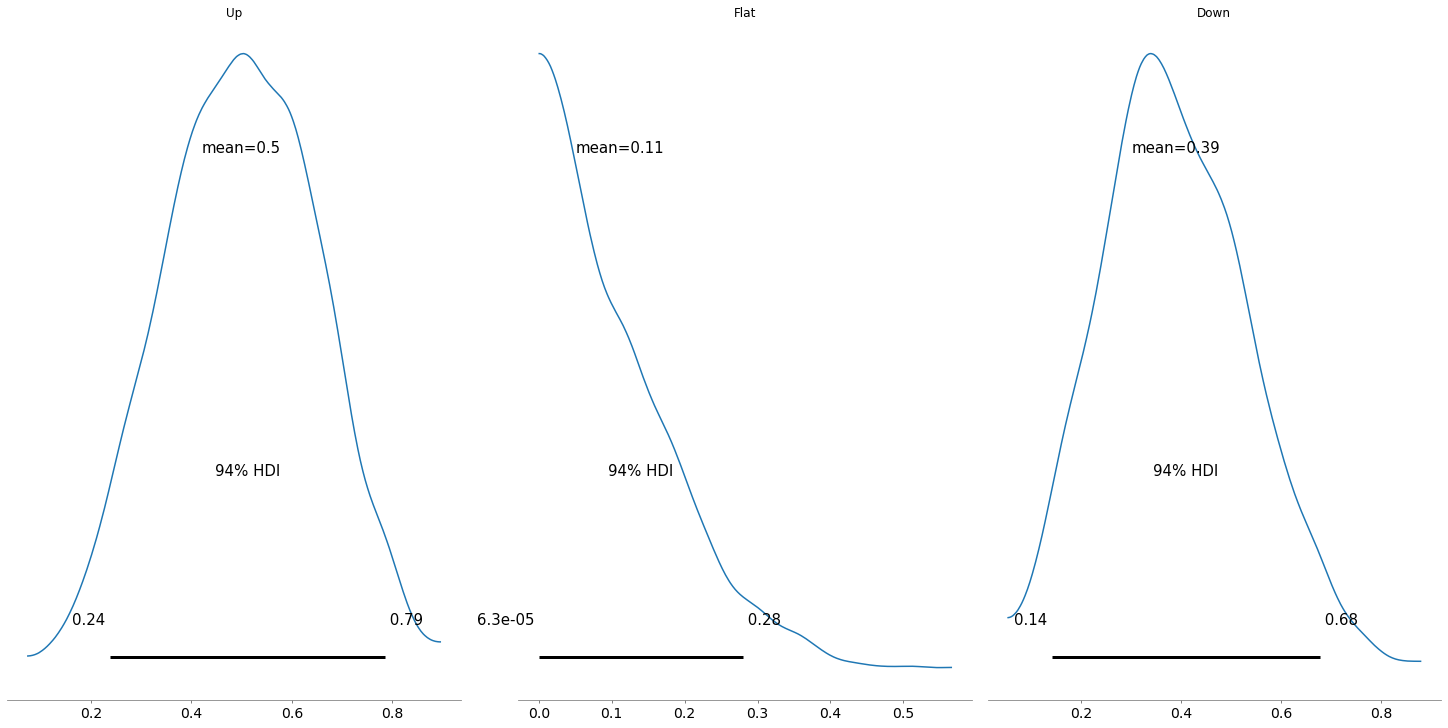

In [160]:
import arviz as az

ax = az.plot_posterior(trace, var_names = ['parameters'], 
                       figsize = (20, 10))

plt.rcParams['font.size'] = 10
for i, a in enumerate(Outcomes):
    ax[i].set_title(a)

C:\Users\Nathan\anaconda3\lib\site-packages\pymc3\plots\__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn(
C:\Users\Nathan\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


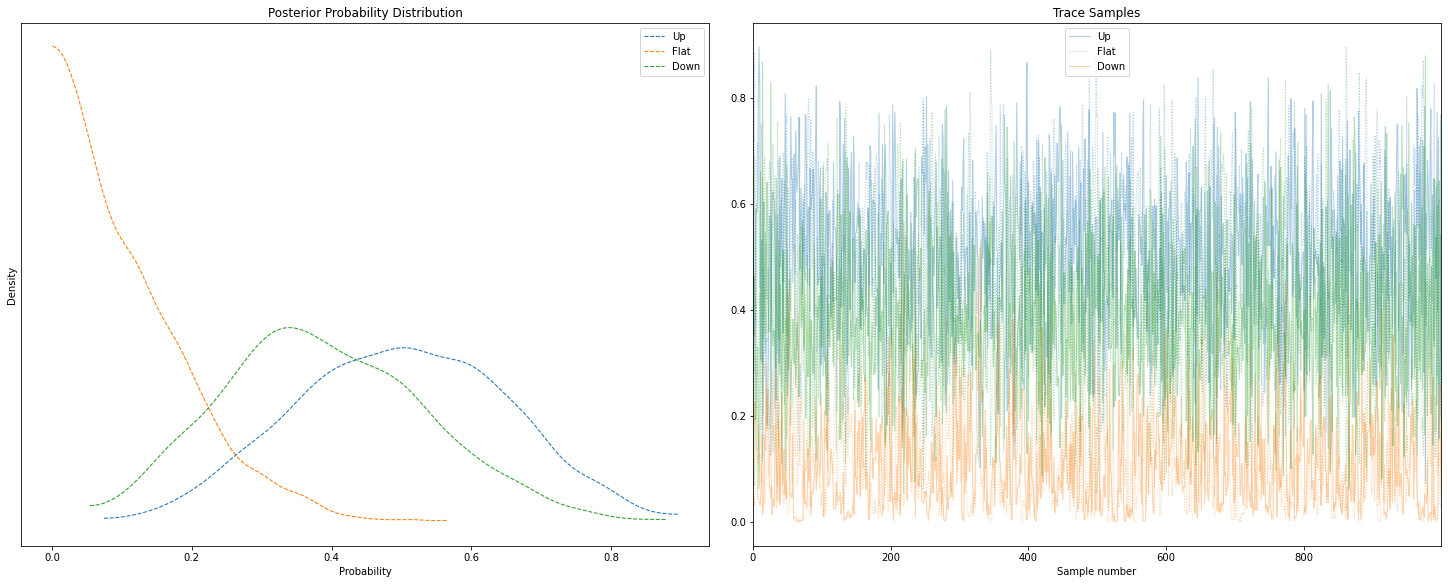

In [161]:
prop_cycle = plt.rcParams['axes.prop_cycle']
cs = [x['color'] for x in list(prop_cycle)]

ax = pm.traceplot(trace, varnames = ['parameters'], figsize = (20, 8), combined = True);
ax[0][0].set_title('Posterior Probability Distribution'); ax[0][1].set_title('Trace Samples');
ax[0][0].set_xlabel('Probability'); ax[0][0].set_ylabel('Density');
ax[0][1].set_xlabel('Sample number');
ax[0][0].legend(('Up', 'Flat', 'Down'))
ax[0][1].legend(('Up', 'Flat', 'Down'))

In [162]:
with model:
    # Find the maximum a posteriori estimate
    map_ = pm.find_MAP()
    
dict(zip(Outcomes, map_['parameters']))

{'Up': 0.5570473199765985,
 'Flat': 0.020134142505058444,
 'Down': 0.4228185375183431}

In [163]:
with model:
    samples = pm.sample_posterior_predictive(trace, samples = 1000)
    
dict(zip(Outcomes, samples['observed_data'].mean(axis = 0)))

C:\Users\Nathan\anaconda3\lib\site-packages\pymc3\sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


{'Up': 5.05, 'Flat': 1.071, 'Down': 3.879}

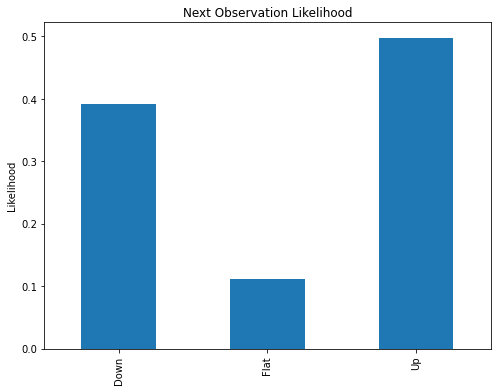

In [164]:
# Draw from the multinomial
next_obs = np.random.multinomial(n = 1, pvals = pvals, size = 10000)

# Data manipulation
next_obs = pd.melt(pd.DataFrame(next_obs, columns = Outcomes)).\
            groupby('variable')['value'].\
            value_counts(normalize=True).to_frame().\
             rename(columns = {'value': 'total'}).reset_index()
next_obs = next_obs.loc[next_obs['value'] == 1]

# Bar plot
next_obs.set_index('variable')['total'].plot.bar(figsize = (8, 6));
plt.title('Next Observation Likelihood');
plt.ylabel('Likelihood'); plt.xlabel('');

In [165]:
next_obs.iloc[:, [0, 2]]

,variable,total
1,Down,0.3909
3,Flat,0.1117
5,Up,0.4974
